#### Aishwarya R
(MDS201808)

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import chardet
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open("SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
df = pd.read_csv("SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

In [4]:
df=df[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [5]:
df.head()
df.drop_duplicates(subset="sms",inplace=True)
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,Can you just come in for a sec? There's somebo...
freq,4516,1


In [5]:
sms = df['sms']
label = df['label']

In [6]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = train_test_split(sms, label, random_state=9)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [7]:
def set_binary_labels(label):
    if label == 'spam':
        return 1
    else:
        return 0

## TF-IDF Vectorizer 

In [8]:
vectorizer = TfidfVectorizer(max_features=5000)

# Model 1 Logistic Regression

Logistic regression is a traditional statistics technique that is also very popular as a machine learning tool. 

Logistic regression is based on logistic distribution under which we assume that the dependent variable is dichotomous in nature. We use the logistic model to compute the probability of falling in any one of the classes.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression(random_state=9)
pipeline_logistic = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', logistic_regression)])

### Calculating Cross Validation score

In [10]:
cv_score_regression = cross_val_score(pipeline_logistic, sms_train, label_train, cv=5)
print("The cross validation score for Logistic Regression is:")
print(cv_score_regression)

The cross validation score for Logistic Regression is:
[0.95454545 0.97129187 0.95215311 0.97368421 0.96886228]


### Precision Recall Curve

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1196
        spam       0.99      0.80      0.88       197

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

The precision recall curve


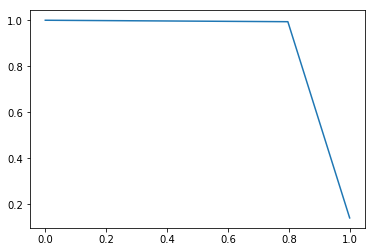

In [11]:
pipeline_logistic.fit(sms_train, label_train)
label_predicted = pipeline_logistic.predict(sms_test)


print(classification_report(label_test,label_predicted))

from sklearn.metrics import precision_recall_curve

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model 2  Decision Tree

Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. The classification technique is a systematic approach to build classification models from an input dat set.  It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached. The decision tree classifiers organized a series of test questions and conditions in a tree structure.  In the decision tree, the root and internal nodes contain attribute test conditions to separate recordes that have different characteristics. All the terminal node is assigned a class lable Yes or No. 

Once the decision tree has been constructed, classifying a test record is straightforward. Starting from the root node, we apply the test condition to the record and follow the appropriate branch based on the outcome of the test. It then lead us either to another internal node, for which a new test condition is applied, or to a leaf node. When we reach the leaf node, the class lable associated with the leaf node is then assigned to the record.



In [12]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
pipeline_decision_tree = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', decision_tree)])

### Calculating Cross Validation score

In [13]:
cv_score_decision_tree = cross_val_score(pipeline_decision_tree, sms_train, label_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_decision_tree)

The cross validation score for Decison Tree is:
[0.965311   0.96291866 0.94258373 0.94617225 0.97005988]


### Precision Recall Curve

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1196
        spam       0.93      0.84      0.88       197

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.95      0.91      0.93      1393
weighted avg       0.97      0.97      0.97      1393

The precision recall curve


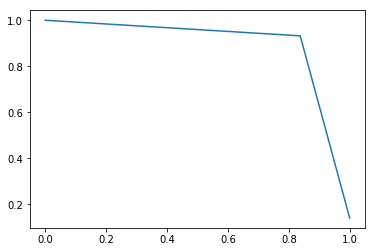

In [14]:
pipeline_decision_tree.fit(sms_train, label_train)
label_predicted = pipeline_decision_tree.predict(sms_test)

print(classification_report(label_test,label_predicted))

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model 3  Naive Bayes(Bernoulli)

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. Naive Bayes is a conditional probability model.

Multivariate Bernoulli model is one of the classifiers under Naive Bayes family. In the Multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks. where binary term occurrence features are used rather than term frequencies.

In [15]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', naive_bayes)])

### Calculating Cross Validation score

In [16]:
cv_score_naive_bayes = cross_val_score(pipeline_bayes, sms_train, label_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.97248804 0.97368421 0.96291866 0.97607656 0.97365269]


### Precision Recall Curve

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1196
        spam       0.99      0.84      0.91       197

   micro avg       0.98      0.98      0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

The precision recall curve


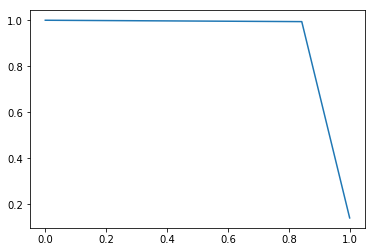

In [17]:
pipeline_bayes.fit(sms_train, label_train)
label_predicted = pipeline_bayes.predict(sms_test)

print(classification_report(label_test,label_predicted))

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)